# Classification with Scikit-Learn

## The data file

For the classification tasks in this notebook we will be using a [classic dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) in image processing. It contains 8x8 images of digits distributed in 10 classes: 

|          .        |  .   |
|:-----------------:|------|
|      Classes      | 10   |
| Samples per class | ~180 |
| Samples total     | 1797 |
| Dimensionality    | 64   |

Luckily, Scikit-learn comes with [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) module that includes utilities to load datasets, including methods to load and fetch popular reference datasets. 

In [1]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets

# The digits dataset
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


We can visualize the samples in the dataset using matplotlib:

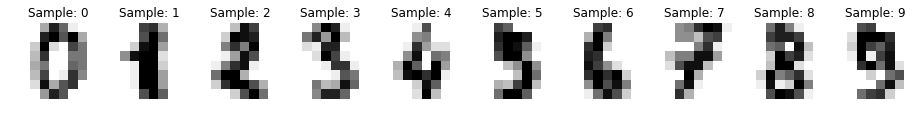

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Individual plots for the digits in the dataset
_, axes = plt.subplots(1, 10, figsize=(16,5))
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Sample: %i' % label)
plt.show()

First, in order to train a classifier on this image dataset, we need to flatten it into a *(samples,features)* array:

In [3]:
# Number of samples: 1797
n_samples = len(digits.images)

# Reshaped digit array
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 64)


Sencond, we need to split the dataset into *train/test* subsets:

In [4]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=1) 

In [5]:
# 80% training, 20% testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


We are finally ready to train our classifier. We are using [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) implemented in Scikit-learn, which offers [several](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) implemented classifiers.

In [6]:
from sklearn import svm

# Support vector classifier
classifier = svm.SVC(gamma=0.001)

# Learn to classify the training set
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

That's it! Now we need to evaluate the performance of our classifier using the testing subset. Predicting and ploting predictions along with testing images allows us to qualitatively address the classifier accuracy. 

In [7]:
# Predict using X_test
y_predicted = classifier.predict(X_test)

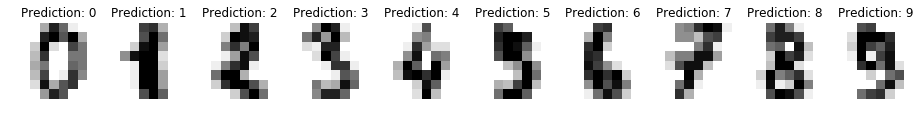

In [8]:
# Individual plots for the digits in the dataset
_, axes = plt.subplots(1, 10, figsize=(16,5))
images_and_predictions = list(zip(X_test.reshape(-1,8,8), y_predicted))
for ax, (image, label) in zip(axes[:], images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % label)
plt.show()

Also, quantitaive metrics can be retrieved by means of [metrics.classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). This method builds a text report showing the main classification metrics. Each row indicates the *precision, recall and f1-score* for each classification category. 

In [9]:
from sklearn import metrics
print("Classification report for classifier {}\n{}\n".format(classifier, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      1.00      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




We can further extend these metrics computing the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html):

Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  0  0  0  0 34]]


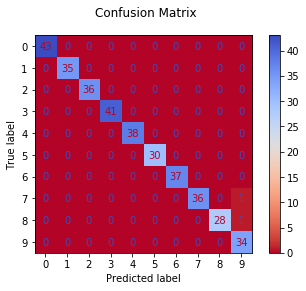

In [13]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='coolwarm')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)